# Visualización   <a class="tocSkip">

Para graficar datos y funciones vamos a usar la biblioteca **Matplotlib**.
Vamos a empezar discutiendo algunas de las características más generales del trabajo con esta biblioteca y mostrar algún ejemplo relativamente sencillo.
Matplotlib está dividido en tres partes o capas conceptualmente bien delimitadas:

* Una parte es la que hace el trabajo más básico creando y administrando cada objeto que forma parte del gráfico (líneas, texto, figuras, etc) así como sus relaciones,
* Una segunda parte que permite un uso simple de las funciones anteriores: una interfaz con el usuario. Un ejemplo es el submódulo **pyplot**.
* Una tercera componente que se encarga de presentar la figura en el formato adecuado. Esto es lo que se llama el *Backend* y se encarga de mostrar la figura en los distintos sistemas de ventanas, o en formatos de archivos correspondientes. Algunos ejemplos de *backend* son: PS (copias PostScript®), SVG (Scalable Vector Graphics), Agg (salida PNG de muy buena calidad), Cairo (png, pdf, ps, svg), GTK (interactivo, permite integrar matplotlib con aplicaciones Gtk+, que usa GNOME), PDF, WxWidgets (interactivo), Qt (interactivo).

Nosotros vamos a concentrarnos principalmente en aprender a utilizar **pyplot**


## Interactividad
### Trabajo con ventanas emergentes

Podemos trabajar en forma interactiva con gráficos desde una terminal de `Ipython`

```python
  import matplotlib.pyplot as plt # o equivalentemente:
  # from matplotlib import pyplot as plt
  plt.plot([0,1,4,9,16,25])
```

El comando (la función) `plot()` crea el gráfico pero no lo muestra. Lo hacemos explícitamente con el comando `show()`
```python
  plt.show()
```

Vemos que es muy simple graficar datos.

Algunas cosas a notar:

1. Se abre una ventana
2. Se bloquea la terminal (no podemos dar nuevos comandos)
3. Si pasamos el *mouse* sobre el gráfico nos muestra las coordenadas.
4. Además del gráfico hay una barra de herramientas:
![](figuras/matplotlib_toolbar.png)
De derecha a izquierda tenemos:
  - **Grabar:** Este botón abre una ventana para guardar el gráfico en alguno de los formatos disponibles.
  
  - **Configuración de subplots:** Permite modificar el tamaño y posición de cada gráfico en la ventana.
  
  - **Agrandar (zoom) a rectángulo:**
     - Si elegimos una región mientras apretamos el botón **izquierdo**, esta será la nueva región visible ocupando toda la ventana.
     - Si elegimos una región mientras apretamos el botón **derecho**, pone toda la vista actual en esta región.
  
  - **Desplazar y agrandar (Pan and zoom):** Este botón cumple dos funciones diferentes:
     - Con el botón izquierdo desplaza la vista. 
     - Con el botón derecho la vista se agrandará achicará en los ejes horizontal y vertical en una cantidad proporcional al movimiento.
     
     Si se oprime las teclas `x` o `y` las dos funciones quedan restringidas al eje correspondiente.
  
  - **Home, Back, Forward** son botones que nos llevan a la vista original, una vista hacia atrás o hacia adelante respectivamente
  

Si ocurre, como en este caso, que proveemos sólo una lista de datos, la función `plot()` la interpreta como los valores correspondientes al eje vertical (eje y), y toma el índice del dato para la variable independiente (eje x). Si queremos dar valores explícitamente para el eje x debemos pasarlos como primer argumento. 

```python
plt.plot([0,1,2,3,4,5],[0,1,4,9,16,25])
plt.show()
```

Como vemos, para que muestre la ventana debemos hacer un llamado explícito a la función `show()`. Esto es así porque muchas veces queremos realizar más de una operación sobre un gráfico antes de mostrarlo. Sin embargo, hay varias alternativas respecto a la interactividad de matplotlib (e ipython) que permiten adecuarla a nuestro flujo de trabajo. La manera más común en una terminal es utilizando las función `ion()` (**i**nteractive **on**) para hacerlo interactivo y la función `ioff()` para no interactivo.

```python
plt.ion()           # Prendemos el modo interactivo
plt.plot([0,1,2,3,4,5],[0,1,4,9,16,25])
```

En el modo interactivo no sólo `plot()` tiene implícito el comando `show()` sino que podemos seguir ingresando comandos con el gráfico abierto.


### Trabajo sobre notebooks

Para trabajar en *ipython notebooks* suele ser conveniente realizar los gráficos dentro de la misma página donde realizamos los cálculos

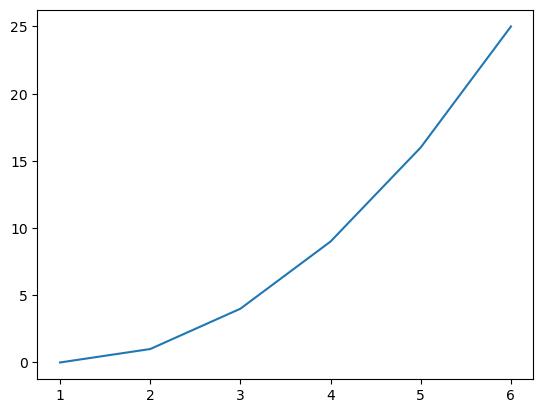

In [1]:
import matplotlib.pyplot as plt
plt.plot([1,2,3,4,5,6],[0,1,4,9,16,25])

En la práctica vamos a usar siempre **Matplotlib** junto con **Numpy**.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Gráficos simples

El paquete *Matplotlib* permite visualizar datos guardados en un archivo con unas pocas líneas

In [3]:
fdatos = '../data/ej_oscil_aten_err.dat'

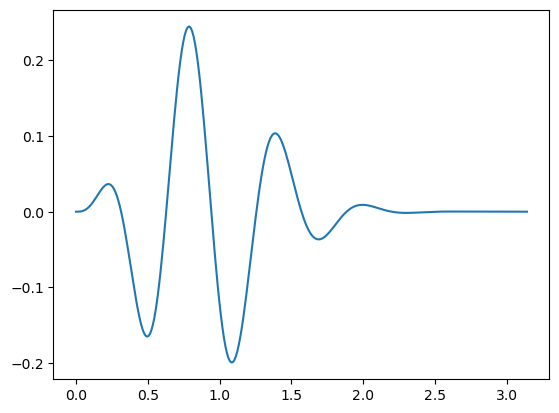

In [4]:
x, y, yexp = np.loadtxt(fdatos, unpack=True)
plt.plot(x, y)

Como vemos, es la curva que graficamos la clase anterior. 

Si miramos el archivo vamos a ver que tiene una columna más que corresponde a los valores medidos. En consecuencia le asignamos esta tercera columna a una variable adicional `yexp` al leerlo.

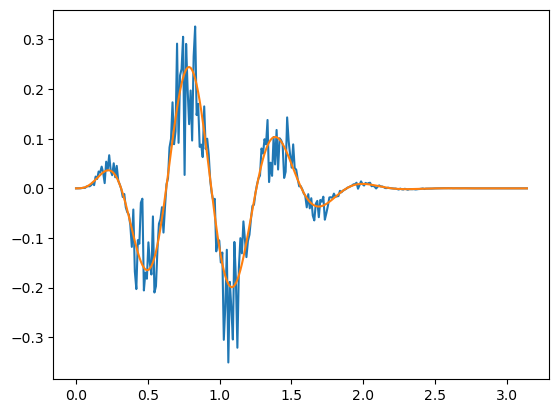

In [5]:
# Graficamos las segunda y tercera columnas como función de la primera
plt.plot(x,yexp, x,y)

## Formato de las curvas
En los gráficos anteriores usamos la función `plot()` en sus formas más simples.

```python
plot(y)
plot(x,y)
plot(x1,y1, x2, y2)
```

dando a la función `plot()` la información mínima necesaria para graficar los datos.
Usualmente queremos poder elegir cómo vamos a graficar nuestros datos.


### Líneas, símbolos y colores

La forma más simple de elegir el modo de graficación de la curva es a través de un tercer argumento.
Este argumento, que aparece inmediatamente después de los datos (x e y), permite controlar el tipo de línea o símbolo utilizado en la graficación. En el caso de la línea sólida se puede especificar con un guión ('-') o simplemente no poner nada, ya que línea sólida es el símbolo por defecto. Las dos especificaciones anteriores son equivalentes. También se puede elegir el color, o el símbolo a utilizar con este argumento:

```python
plot(x,y,'g-')
plot(x,y,'ro')
plot(x,y,'r-o')
```

![](figuras/simple_linea_simb.png)

Para obtener círculos usamos una especificación que corresponde a 'o'. Además podemos poner en este argumento el color. En este caso elegimos graficar en color "rojo (r), con una línea (-) + círculos (o)".

Con esta idea modificamos el gráfico anterior

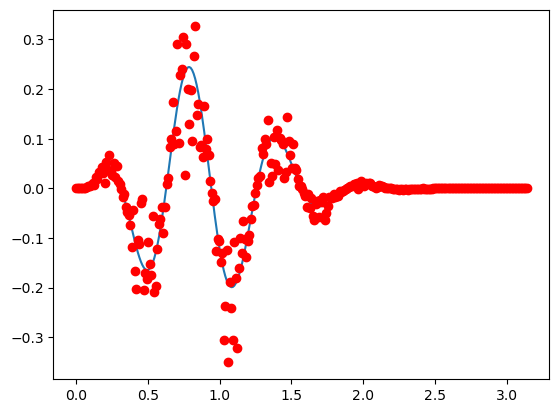

In [6]:
plt.plot(x,y,'-', x,yexp, 'ro')

Para graficar más de una curva, en este formato simple, podemos ponerlo todo en la misma función `plot()` en la forma `plot(x1, y1, [formato], x2, y2, [formato2])` pero muchas veces es más legible separar los llamados a la función, una para cada curva. 

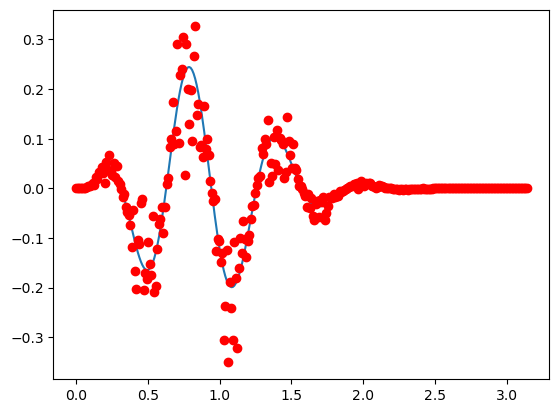

In [7]:
plt.plot(x,y, '-')
plt.plot(x,yexp, 'or')

Al separar los llamados a la función `plot()` obtenemos un código más claro, principalmente cuando agregamos opciones de formato.

Los siguientes caracteres pueden utilizarse para controlar el símbolo de graficación:


| Símbolo   |     Descripción        |
|-----------|------------------------|
| '-'       | solid line style       |
| '--'      | dashed line style      |
| '-.'      | dash-dot line style    |
| ':'       | dotted line style      |
| '.'       | point marker           |
| ','       | pixel marker           |
| 'o'       | circle marker          |
| 'v'       | triangle down  marker  |
| '^'       | triangle up  marker    |
| '&lt;'    | triangle left  marker  |
| '&gt;'    | triangle right  marker |
| '1'       | tri down  marker       |
| '2'       | tri up  marker         |
| '3'       | tri left  marker       |
| '4'       | tri right  marker      |
| 's'       | square marker          |
| 'p'       | pentagon marker        |
| '\*'      | star marker            |
| 'h'       | hexagon1 marker        |
| 'H'       | hexagon2 marker        |
| '+'       | plus marker            |
| 'x'       | x marker               |
| 'D'       | diamond marker         |
| 'd'       | thin diamond marker    |
| '&#124;'  | vline marker           |
| '\_'      | hline marker           |


Los colores también pueden elegirse usando los siguientes caracteres:


|  Letra  |   Color  |
|---------|----------|
|'b'      |   blue   |
|'g'      |   green  |
|'r'      |   red    |
|'c'      |   cyan   |
|'m'      |   magenta|
|'y'      |   yellow |
|'k'      |   black  |
|'w'      |   white  |

Por ejemplo, utilizando:

```python
plt.plot(x, y1, 'gs', x, y2, '-k^', x, y3, '--r' )
```

obtenemos:
![](figuras/simple_varios.png)


La función `plot()` acepta un número variable de argumentos. Veamos lo que dice la documentación

```python

Signature: plt.plot(*args, **kwargs)
Docstring:
Plot y versus x as lines and/or markers.

Call signatures::

    plot([x], y, [fmt], data=None, **kwargs)
    plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)
```

En particular, podemos usar los argumentos *keywords* (pares nombre-valor) para cambiar el modo en que se grafican los datos. Algunos de los más comunes son:

| Argumento       | Valor                        |
|-----------------|------------------------------|
| linestyle       | {'-', '–', '-.', ':', '', …} |
| linewidth       | número real                  |
| color           | un color                     |
| marker          | {'o', 's', 'd', ….}          |
| markersize      | número real                  |
| markeredgecolor | color                        |
| markerfacecolor | color                        |
| markevery       | número entero                |



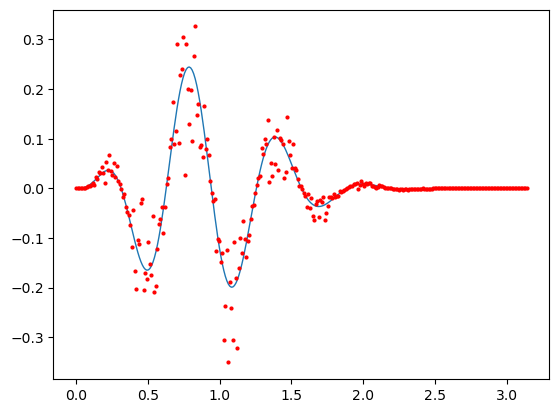

In [8]:
plt.plot(x,y,linewidth=1)
plt.plot(x,yexp, 'o', color='red', markersize=2)

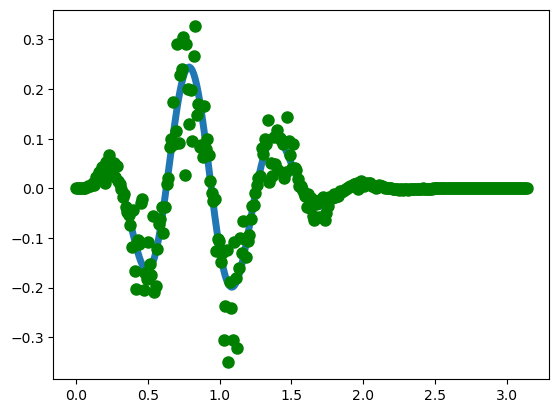

In [9]:
plt.plot(x,y,linewidth=5)
plt.plot(x,yexp, 'o', color='green', markersize=8)

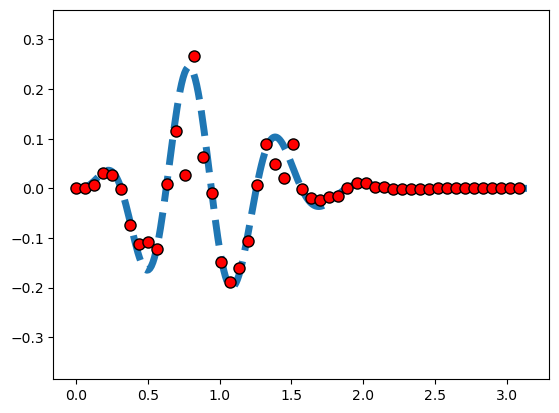

In [10]:
plt.plot(x,y,linewidth=5, linestyle='dashed')
plt.plot(x,yexp, 'o', color='red', markersize=8, markeredgecolor='black',markevery=6)

### Nombres de ejes y leyendas

Vamos ahora a agregar nombres a los ejes y a las curvas.

Para agregar nombres a las curvas, tenemos que agregar un `label`, en este caso en el mismo comando `plot()`, y luego
mostrarlo con `legend()

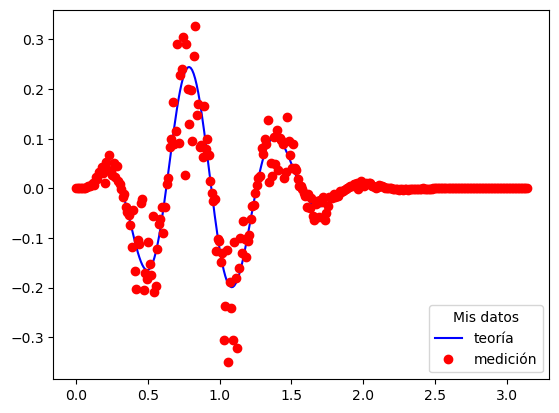

In [11]:
plt.plot(x,y, '-b', label="teoría")
plt.plot(x,yexp, 'or', label="medición")
#plt.legend()
plt.legend(loc="lower right", title="Mis datos")

Para agregar nombres a los ejes usamos `xlabel` y `ylabel`:

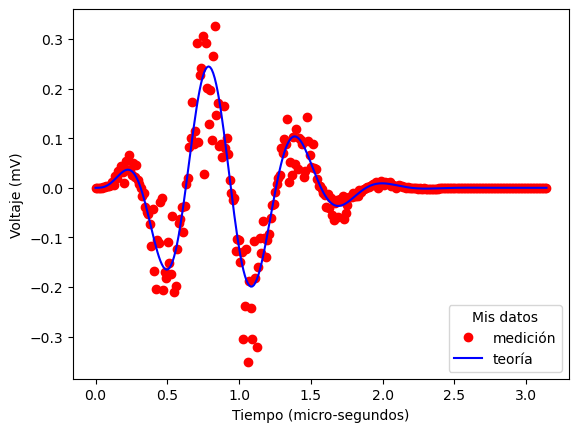

In [12]:
plt.plot(x,yexp, 'or', label="medición")
plt.plot(x,y, '-b', label="teoría")
plt.legend(loc="lower right", title="Mis datos")
plt.xlabel('Tiempo (micro-segundos)')
plt.ylabel("Voltaje (mV)");

Los títulos a la figura se pueden agregar con `title`

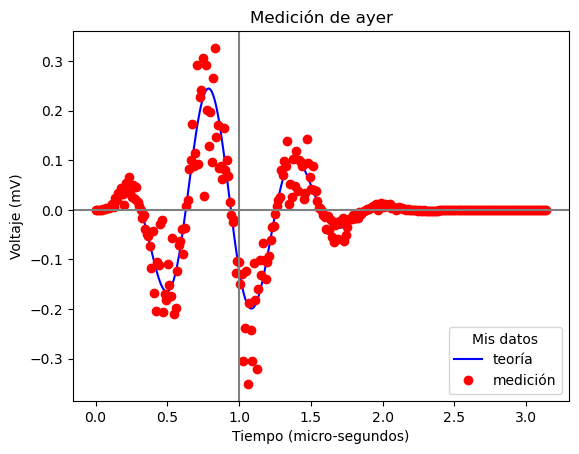

In [13]:
plt.plot(x,y, '-b', label="teoría")
plt.plot(x,yexp, 'or', label="medición")
plt.legend(loc="lower right", title="Mis datos")
plt.xlabel('Tiempo (micro-segundos)')
plt.ylabel("Voltaje (mV)")
plt.title("Medición de ayer")
plt.axvline(x=1, color='gray')
plt.axhline(color='gray')

Acá además agregamos una línea vertical y una horizontal.

------

## Ejercicios 09 (a)

1. Realizar un programa para visualizar la función
   $$ f(x,n,w) = x^n |\sin(w x)| $$

   El programa debe realizar el gráfico para $w=10$, con cuatro curvas para $n=1,2,3,4$, similar al que se muestra
   en la siguiente figura

   ![](figuras/ejerc_vis_f1.png)

------

## Escalas y límites de graficación (vista)

Para cambiar los límites de graficación se puede usar las funciones `xlim` para el eje horizontal y `ylim` para el vertical

In [ ]:
plt.plot(x,y, '-b', label="teoría")
plt.plot(x,yexp, 'or', label="medición")
plt.legend(loc="lower right", title="Mis datos")
plt.xlabel('Tiempo (micro-segundos)')
plt.ylabel("Voltaje (mV)")
plt.title("Medición de ayer")
plt.axvline(x=1, color='gray')
plt.axhline(color='gray')
plt.xlim((0,2.5))
plt.ylim((-0.4, 0.32))

Para pasar a escala logarítmica usamos `xscale` o `yscale`

In [ ]:
plt.plot(x,y, '-b', label="teoría")
plt.plot(x,yexp, 'or', label="medición")
plt.legend(loc="best", title="Mis datos")
plt.xlabel('Tiempo (micro-segundos)')
plt.ylabel("Voltaje (mV)")
plt.title("Medición de ayer")
plt.axvline(x=1, color='gray')
plt.axhline(color='gray')
plt.xlim((1.e-1,3))
plt.xscale('log')
plt.ylim((-0.4, 0.32))

In [ ]:
plt.plot(x,1+y, '-b', label="teoría")
plt.plot(x,1+yexp, 'or', label="medición")
plt.legend(loc="best", title="Mis datos")
plt.xlabel('Tiempo (micro-segundos)')
plt.ylabel("Voltaje (mV)")
plt.title("Medición de ayer")
plt.axvline(x=1, color='gray')
plt.axhline(color='gray')
plt.xlim((1.e-1,3))
plt.xscale('log')
plt.yscale('log')
plt.ylim((0.6, 1.4))

## Exportar las figuras

Para guardar las figuras en alguno de los formatos disponibles utilizamos la función `savefig()`.

In [ ]:
foname = 'ej_plot_osc'
plt.plot(x,y, '-b', label=r"$\frac{\sin(x^2)}{[2 + \cos (x)]^2}$")
plt.plot(x,yexp, 'or', label="$\mathrm{Medición}$")
plt.legend(loc="best", title="Mis datos", fontsize='x-large')
plt.xlabel(r'Tiempo ($\mu$-segundos)', fontsize='x-large')
plt.ylabel("Voltaje (mV)", fontsize='x-large')
plt.title("Medición de ayer")
plt.axvline(x=1, color='gray')
plt.axhline(color='gray')
plt.xlim((0,3))
plt.ylim((-0.4, 0.32))
plt.grid()
#plt.grid(color='green', linestyle='dashed', linewidth=1)
plt.savefig(f'{foname}.png')
plt.savefig(f'{foname}.pdf')

In [ ]:
%pwd

In [ ]:
help(plt.grid)

Acá también hemos utilizado formato tipo LaTeX para parte del texto. Si utilizamos una expresión encerrada entre los símbolos `$`, matplotlib interpreta que está escrito en (un subconjunto) de LaTeX.

**Matplotlib** tiene un procesador de símbolos interno para mostrar la notación en LaTeX que reconoce los elementos más comunes, o puede elegirse utilizar un procesador LaTeX externo.

## Dos gráficos en la misma figura

Hay varias funciones que permiten poner más de un gráfico en la misma figura. Veamos un ejemplo utilizando la función `subplots()`

In [ ]:
# %load scripts/ejemplo_08_5.py
#! /usr/bin/ipython3

""" Script realizado durante la clase 9. Dos figuras """
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt
plt.ion()

fname = 'ej_oscil_aten_err'
# Levantamos los datos
pardir = Path("..")
datfile = pardir / f'data/{fname}.dat'

x1, y1, y2 = np.loadtxt(datfile, unpack=True)
# Vamos a graficar sólo algunos valores (uno de cada 5)
x = x1[3:-10:5]
y = y1[3:-10:5]
yexp = y2[3:-10:5]

# Ejemplo de barras de error que dependen del eje x
error = 0.05 + 0.3 * np.abs(y)

fig, (ax0, ax1) = plt.subplots(num='subplots', nrows=2, sharex=True)
ax0.errorbar(x, yexp, yerr=error, fmt='-o')
ax1.plot(x, 2 * (yexp - y) / (yexp + y), 'or', markersize=8)


# Límites de graficación y títulos
ax0.set_title('Datos con error variable')
ax1.set_title('Error relativo')
ax0.set_ylabel('Voltaje (mV)', fontsize='x-large')
ax1.set_xlabel(r'Tiempo ($\mu$-seg)', fontsize='x-large')
ax1.set_ylabel('Error relativo', fontsize='x-large')
ax1.set_xlim((0, 3))

# Guardamos el resultado
plt.savefig(f'{fname}.png', dpi=150)


In [ ]:
# %load scripts/ejemplo_08_5.py
#! /usr/bin/ipython3

""" Script realizado durante la clase 9. Dos figuras """
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt
plt.ion()

fname = 'ej_oscil_aten_err'
# Levantamos los datos
pardir = Path("..")
datfile = pardir / f'data/{fname}.dat'

x1, y1, y2 = np.loadtxt(datfile, unpack=True)
# Vamos a graficar sólo algunos valores (uno de cada 5)
x = x1[3:-10:5]
y = y1[3:-10:5]
yexp = y2[3:-10:5]

# Ejemplo de barras de error que dependen del eje x
error = 0.05 + 0.3 * np.abs(y)

fig, (ax0, ax1) = plt.subplots(num='subplots', figsize=(10,4), nrows=1, ncols=2)
ax0.errorbar(x, yexp, yerr=error, fmt='-o')
ax1.plot(x, 2 * (yexp - y) / (yexp + y), 'or', markersize=8)


# Límites de graficación y títulos
ax0.set_title('Datos con error variable')
ax1.set_title('Error relativo')
ax0.set_ylabel('Voltaje (mV)', fontsize='x-large')
ax1.set_xlabel(r'Tiempo ($\mu$-seg)', fontsize='x-large')
ax1.set_ylabel('Error relativo', fontsize='x-large')
ax1.set_xlim((0, 3))

# Guardamos el resultado
plt.savefig(f'{fname}_B.png', dpi=150)


En este ejemplo utilizamos un enfoque diferente al utilizado anteriormente. Matplotlib presenta también una interface orientada a objetos. La función `subplots()` devuelve un par ```fig, axis``` que son dos objetos utilizados para representar la *figura* y un *eje*. Los métodos de estos objetos presentan funcionalidad similar a las funciones del módulo `pyplot`.

-----

## Ejercicios 09 (b)

2. Para la función definida a trozos:
   $$
   f(x) =
   \begin{cases}
     f_{1}(x) = x^{2}/8 & - \pi < x \le \pi/2  \\
     f_{2}(x) = -0.3 x  & \pi/2 < x < \pi \\
     f_{3}(x) = -(x - 2 \pi)^{2}/6 & \pi \le x \le 5 \pi/2 \\
     f_{4}(x) = (x - 2 \pi)/5 & 5 \pi/2 < x \le 3 \pi
     \end{cases}
   $$
   realizar la siguiente figura de la manera más fiel posible.

   ![](figuras/ejercicio_08_1.png)

   **Pistas:** Buscar información sobre `plt.text()`, `plt.fill_between()` y sobre `plt.xticks` y `plt.yticks`. 

3. Rehacer la siguiente figura:

   ![](figuras/ejercicio_08_2.png)

-----

.